# Connecting to GoogleDrive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing of all required libraries

In [ ]:
from numpy import asarray
from PIL import Image
import numpy as np 
import os
import matplotlib.pyplot as plt
import imageio
import random
import matplotlib.image as mpimg
import cv2

# Image shape and data path

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 100

img_path = r'/content/drive/MyDrive/wildfire'
train_path = r'/content/drive/MyDrive/wildfire/train'
validation_path = r'/content/drive/MyDrive/wildfire/valid'
test_path = r'/content/drive/MyDrive/wildfire/test'

# Showing some figures

### Wildfire

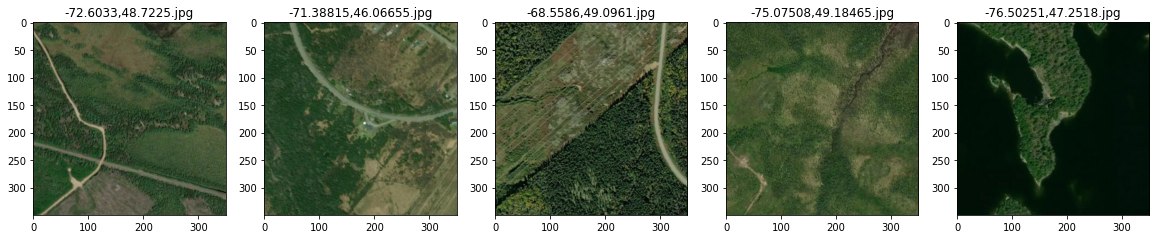

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('/content/drive/MyDrive/wildfire/train/wildfire'))
    image_path = os.path.join('/content/drive/MyDrive/wildfire/train/wildfire', file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

### Nowildfire

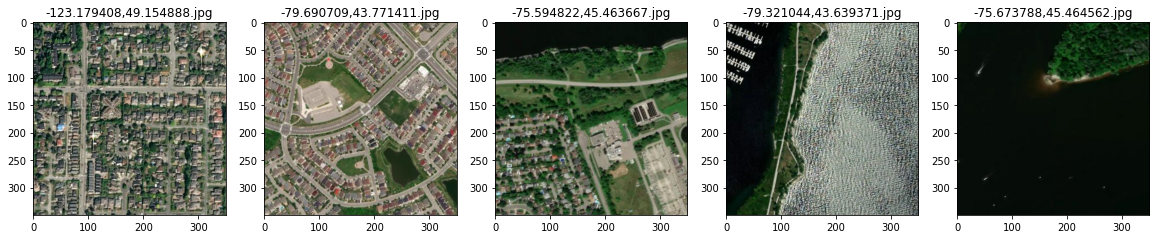

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('/content/drive/MyDrive/wildfire/train/nowildfire'))
    image_path = os.path.join('/content/drive/MyDrive/wildfire/train/nowildfire', file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Build datasets as NumPy array

In [ ]:
def build_dataset(img_folder):
    img_data_array = []
    class_name = []
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1,  file)
            image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name 

### Training set NumPy array transformation

In [ ]:
train_data, train_class_name = build_dataset(train_path)

In [ ]:
train_target_dict = {k: v for v, k in enumerate(np.unique(train_class_name))}
train_target_dict

{'nowildfire': 0, 'wildfire': 1}

In [ ]:
train_target_val = [train_target_dict[train_class_name[i]] for i in range(len(train_class_name))]

In [ ]:
X_train = np.array(train_data, np.float32)

In [ ]:
y_train = np.array(list(map(int, train_target_val)), np.float32)

### Saving as NumPy array

In [ ]:
np.save('/content/drive/MyDrive/wildfire/numpy/X_train.npy', X_train)
np.save('/content/drive/MyDrive/wildfire/numpy/y_train.npy', y_train)

### Validation set NumPy array transformation

In [ ]:
validation_data, validation_class_name = build_dataset(validation_path)

In [ ]:
validation_target_dict = {k: v for v, k in enumerate(np.unique(validation_class_name))}
validation_target_dict

{'nowildfire': 0, 'wildfire': 1}

In [ ]:
validation_target_val = [validation_target_dict[validation_class_name[i]] for i in range(len(validation_class_name))]

In [ ]:
X_validation = np.array(validation_data, np.float32)

In [ ]:
y_validation = np.array(list(map(int, validation_target_val)), np.float32)

### Saving as NumPy array

In [ ]:
np.save('/content/drive/MyDrive/wildfire/numpy/X_validation.npy', X_validation)
np.save('/content/drive/MyDrive/wildfire/numpy/y_validation.npy', y_validation)

### Test set NumPy array transformation

In [ ]:
test_data, test_class_name = build_dataset(test_path)

In [ ]:
test_target_dict = {k: v for v, k in enumerate(np.unique(test_class_name))}
test_target_dict

{'nowildfire': 0, 'wildfire': 1}

In [ ]:
test_target_val = [test_target_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [ ]:
X_test = np.array(test_data, np.float32)

In [ ]:
y_test = np.array(list(map(int, test_target_val)), np.float32)

### Saving as NumPy array

In [ ]:
np.save('/content/drive/MyDrive/wildfire/numpy/X_test.npy', X_test)
np.save('/content/drive/MyDrive/wildfire/numpy/y_test.npy', y_test)